# Capstone

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display="diagram")
import plotly.express as px
from random import shuffle, seed

### Loading data

In [2]:
df = pd.read_excel('Data.xlsx')

In [3]:
df.head()

,patient_id,Age,Ethnicity,Race,Sex,Medication,PatPay,PayorPlanPay,AssistancePay,Payor,Diabetes,HeartFailure,HbA1c,Patience Adherence
0,1,33,Non Hispanic,White,Male,JARDIANCE,0.0,13.47,0.00,Federal Insurance,Yes,No,10.4,No
1,2,55,Hispanic,Mixed,Male,FARXIGA,0.0,499.82,26.31,Commercial Insurance with Assistance,Yes,No,8.8,Yes
2,2,55,Hispanic,Mixed,Male,FARXIGA,0.0,499.82,26.31,Commercial Insurance with Assistance,Yes,No,8.8,Yes
3,2,55,Hispanic,Mixed,Male,FARXIGA,0.0,499.82,26.31,Commercial Insurance with Assistance,Yes,No,8.8,Yes
4,2,55,Hispanic,Mixed,Male,FARXIGA,0.0,499.82,26.31,Commercial Insurance with Assistance,Yes,No,8.8,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          489 non-null    int64  
 1   Age                 489 non-null    int64  
 2   Ethnicity           489 non-null    object 
 3   Race                489 non-null    object 
 4   Sex                 489 non-null    object 
 5   Medication          489 non-null    object 
 6   PatPay              489 non-null    float64
 7   PayorPlanPay        489 non-null    float64
 8   AssistancePay       489 non-null    float64
 9   Payor               489 non-null    object 
 10  Diabetes            489 non-null    object 
 11  HeartFailure        489 non-null    object 
 12  HbA1c               483 non-null    float64
 13  Patience Adherence  489 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 53.6+ KB


### Data cleaning

Checking if there is any null values in the dataset

In [5]:
df.isnull().sum()

patient_id            0
Age                   0
Ethnicity             0
Race                  0
Sex                   0
Medication            0
PatPay                0
PayorPlanPay          0
AssistancePay         0
Payor                 0
Diabetes              0
HeartFailure          0
HbA1c                 6
Patience Adherence    0
dtype: int64

In [6]:
df= df.dropna()

In [7]:
df.isnull().sum()

patient_id            0
Age                   0
Ethnicity             0
Race                  0
Sex                   0
Medication            0
PatPay                0
PayorPlanPay          0
AssistancePay         0
Payor                 0
Diabetes              0
HeartFailure          0
HbA1c                 0
Patience Adherence    0
dtype: int64

In [12]:
X = df.drop(['Patience Adherence','patient_id'], axis = 1)
y = df['Patience Adherence']

<Axes: >

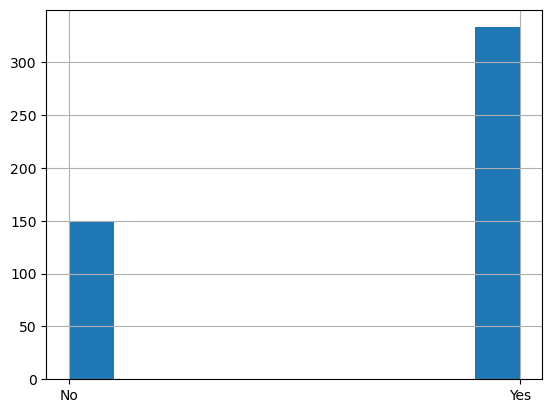

In [9]:
y.hist()

### Splitting data into training and validation sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Data transformation:

Create separate transformers for numeric and categorical features. For numeric, we scale the data. For categorical, we apply OneHot encoding

In [14]:
# Create separate transformers for numeric and categorical features
numeric_features = make_column_selector(dtype_include=int) # List of numeric feature column names
categorical_features = make_column_selector(dtype_include=object) # List of categorical feature column names

transformer = make_column_transformer((OneHotEncoder(drop = 'first'), categorical_features),
                                     remainder = StandardScaler())

### Data Modeling and Evaluation

We considered 4 models:
- Knearest Neighbor
- Decision Tree
- Logistic Regression 
- SVM

We used accuaracy for training and test sets as evaluation metrics


In [15]:
## Modol #1: Logistic Regression 

%time
logistic_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

logistic_pipe.fit(X_train, y_train)

logistic_pipe_train_acc = logistic_pipe.score(X_train, y_train)
logistic_pipe_test_acc = logistic_pipe.score(X_test, y_test)

print (logistic_pipe_train_acc, logistic_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
0.7983425414364641 0.6611570247933884


In [18]:
## Modol #2:  K-nearest Neighbor

%time
knn_pipe = Pipeline([('transformer', transformer),
                    ('knn', KNeighborsClassifier(n_neighbors=3))])

knn_pipe.fit(X_train, y_train)

knn_pipe_train_acc = knn_pipe.score(X_train, y_train)
knn_pipe_test_acc = knn_pipe.score(X_test, y_test)

print (knn_pipe_train_acc, knn_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
0.9088397790055248 0.8016528925619835


In [19]:
## Modol #3:  Decision Tree


%time
tree_pipe = Pipeline([('transformer', transformer),
                    ('tree', DecisionTreeClassifier(random_state = 42))])

tree_pipe.fit(X_train, y_train)

tree_pipe_train_acc = tree_pipe.score(X_train, y_train)
tree_pipe_test_acc = tree_pipe.score(X_test, y_test)

print (tree_pipe_train_acc, tree_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
1.0 0.8264462809917356


In [22]:
## Modol #4:  SVM

%time
svc_pipe = Pipeline([('transformer', transformer),
                    ('svc', SVC())])

svc_pipe.fit(X_train, y_train)

svc_pipe_train_acc = svc_pipe.score(X_train, y_train)
svc_pipe_test_acc = svc_pipe.score(X_test, y_test)

print (svc_pipe_train_acc, svc_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
0.8480662983425414 0.71900826446281


In [23]:
res_dict = {'model': ['KNN', 'Logistic Regression','Tree', 'SVC'],
           'train_score': [knn_pipe_train_acc, logistic_pipe_train_acc, tree_pipe_train_acc,svc_pipe_train_acc ],
           'test_score': [knn_pipe_test_acc, logistic_pipe_test_acc,tree_pipe_test_acc,svc_pipe_test_acc]}
result = pd.DataFrame(res_dict)

In [24]:
result

,model,train_score,test_score
0,KNN,0.908840,0.801653
1,Logistic Regression,0.798343,0.661157
2,Tree,1.000000,0.826446
3,SVC,0.848066,0.719008


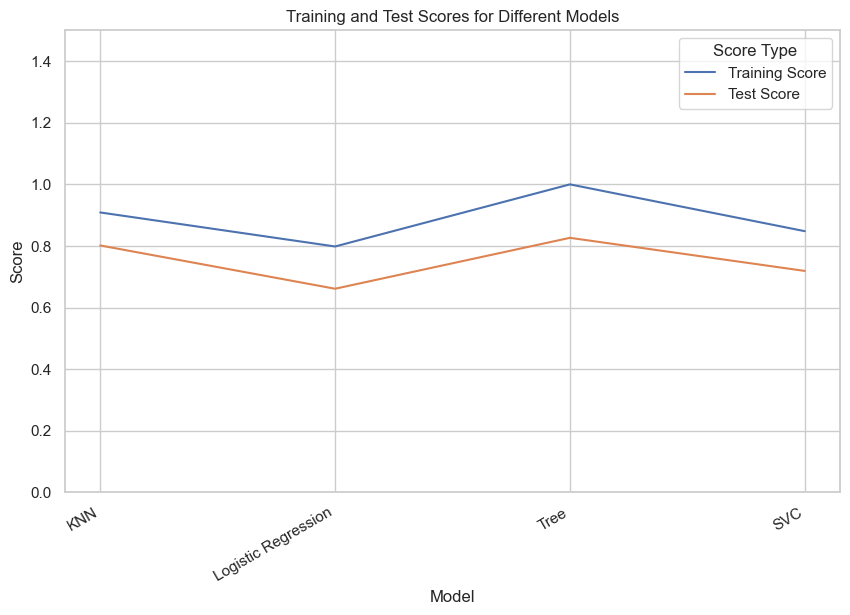

In [31]:
# Set the style of the plot
sns.set(style="whitegrid")

# Melt the DataFrame to combine training and test scores into a single column
df_melted = result.melt(id_vars='model', var_name='score_type', value_name='score')

# Create a bar plot
plt.figure(figsize=(10, 6)
)
ax = sns.lineplot(x='model', y='score', hue='score_type', data=df_melted)
plt.title('Training and Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.5)  # Set the y-axis limit
plt.xticks(rotation=30, ha='right')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Training Score', 'Test Score'], title='Score Type')

# Show the combined plot
plt.show()

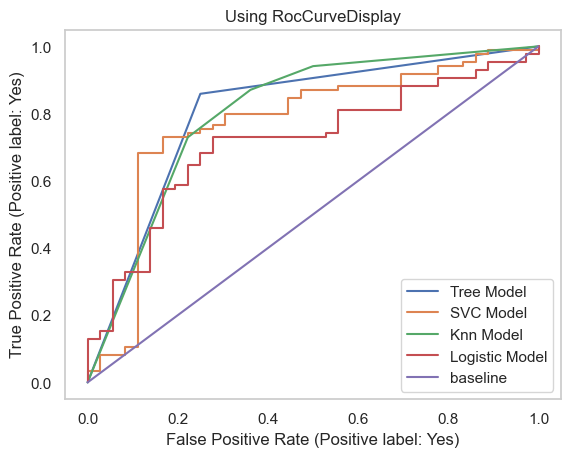

In [75]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(tree_pipe, X_test, y_test, pos_label = 'Yes', ax = ax, label = 'Tree Model')
RocCurveDisplay.from_estimator(svc_pipe, X_test, y_test, ax = ax, label = 'SVC Model')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax, label = 'Knn Model')
RocCurveDisplay.from_estimator(logistic_pipe, X_test, y_test, ax = ax, label = 'Logistic Model')

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


## Conclusion:

Based on accuracy on the validation set, Tree model outperformed all other models.

In [66]:
tree_pipe.named_steps['tree']



DecisionTreeClassifier(random_state=42)

In [65]:
plt.figure(figsize=(100,100))  # set plot size (denoted in inches)
plot_tree(tree_pipe.named_steps['tree'], filled = True, feature_names=tree_pipe[:-1].get_feature_names_out().tolist(), fontsize=20);
plt.savefig('tree.png')

#plt.show()

In [71]:
important_features_model = permutation_importance(tree_pipe,X_train,y_train, n_repeats=10, random_state=42)
print(f'Permutation Importantce:   { important_features_model.importances_mean }')
idx_1 = important_features_model.importances_mean.argsort()
fig_model1 = px.bar(x = important_features_model.importances_mean[idx_1], y = X_train.columns[idx_1], title = 'Important Features for Tree Model')
fig_model1.show()

Permutation Importantce:   [0.21933702 0.14447514 0.14005525 0.02237569 0.12071823 0.
 0.01187845 0.08287293 0.         0.00414365 0.         0.
 0.31491713]


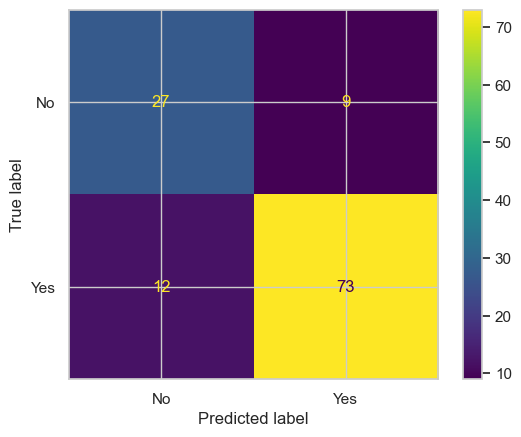

In [77]:
preds = np.where( (np.where(tree_pipe.predict_proba(X_test)[:, 1] > .4, 1, 0)) == 1,  'Yes', 'No')
cm  = confusion_matrix(y_test, preds, labels=tree_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No','Yes'])
disp.plot()
plt.show()

